## Convolutional Neural Network

#Importing the Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

1. ### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale= 1./255, # Rescale pixel values to [0, 1]
                                   shear_range=0.2, #randomly rotate the image by 20 degrees counter clockwise
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/dataset/training_set',
                                                 target_size=(128,128),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 8000 images belonging to 2 classes.


2. ## Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(directory='/content/drive/MyDrive/dataset/test_set',
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN


In [4]:
# function to build CNN model
def build_model():
  model = tf.keras.models.Sequential() #### Initialising the CNN
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128,128,3])) ### setting up the first Convolution Layer
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)) # Pooling Layer
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')) #Second Convolution Layer
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
  model.add(tf.keras.layers.Flatten()) # Flattening Layer
  model.add(tf.keras.layers.Dense(units=256, activation='relu')) #Full Connection
  model.add(tf.keras.layers.Dense(units=1, activation='softmax')) #Output Layer
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model



### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
%%time
model = build_model()
model.fit(x=training_set, steps_per_epoch=8000/32, epochs=25, validation_data=test_set,validation_steps=2000)

Epoch 1/25
250/250 [==============================] - ETA: 0s - loss: 0.7112 - accuracy: 0.5000 

250/250 [==============================] - 7146s 29s/step - loss: 0.7112 - accuracy: 0.5000 - val_loss: 0.6749 - val_accuracy: 0.5000
Epoch 2/25
250/250 [==============================] - 62s 246ms/step - loss: 0.6584 - accuracy: 0.5000
Epoch 3/25
250/250 [==============================] - 62s 249ms/step - loss: 0.6390 - accuracy: 0.5000
Epoch 4/25
250/250 [==============================] - 61s 243ms/step - loss: 0.6242 - accuracy: 0.5000
Epoch 5/25
250/250 [==============================] - 61s 245ms/step - loss: 0.5941 - accuracy: 0.5000
Epoch 6/25
250/250 [==============================] - 62s 248ms/step - loss: 0.5541 - accuracy: 0.5000
Epoch 7/25
250/250 [==============================] - 62s 249ms/step - loss: 0.5292 - accuracy: 0.5000
Epoch 8/25
250/250 [==============================] - 62s 249ms/step - loss: 0.4967 - accuracy: 0.5000
Epoch 9/25
250/250 [==============================] - 62s 247ms/step - loss: 0.4611 - accuracy: 0.5000


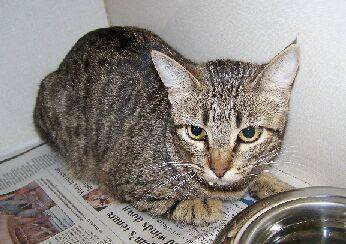

In [ ]:
#Making prediction
from IPython.display import display, Image
Image('/content/drive/MyDrive/dataset/test_set/cats/cat.5000.jpg')

In [ ]:
import numpy as np
import keras.utils as image
test_image = image.load_img('/content/drive/MyDrive/dataset/test_set/cats/cat.5000.jpg',
                            target_size=(128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 21ms/step


In [ ]:
print(prediction)

dog


In [ ]:
model.save('/content/drive/MyDrive/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 2 - Convolutional Neural Networks -CNN/network.h5"')